# **Pre-processing Data using Pandas**

## Import Libraries

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import requests
import numpy as np
import pandas as pd
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

In [4]:
PATH = '/content/drive/MyDrive/Data_FL/'

### Data tháng 1/2024

In [4]:
df1 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M1.csv')
df1.head()
df1.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5225,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10431,1043106,30431,AVL,"Asheville, NC",NC,37,North Carolina,36,1410,1406.0,-4.0,0.0,0.0,-1.0,1400-1459,10.0,1416.0,1449.0,5.0,1511,1454.0,-17.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,61.0,48.0,33.0,1.0,164.0,1,0
1,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5115,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,1545,1541.0,-4.0,0.0,0.0,-1.0,1500-1559,14.0,1555.0,1624.0,3.0,1700,1627.0,-33.0,0.0,0.0,-2.0,1700-1759,0.0,0.0,135.0,106.0,89.0,1.0,651.0,3,0
2,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5414,11423,1142308,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,626,621.0,-5.0,0.0,0.0,-1.0,0600-0659,12.0,633.0,900.0,9.0,917,909.0,-8.0,0.0,0.0,-1.0,0900-0959,0.0,0.0,111.0,108.0,87.0,1.0,533.0,3,0
3,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,20363,9E,N133EV,5284,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,14685,1468502,34685,SAV,"Savannah, GA",GA,13,Georgia,34,1815,1810.0,-5.0,0.0,0.0,-1.0,1800-1859,21.0,1831.0,2014.0,5.0,2045,2019.0,-26.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,150.0,129.0,103.0,1.0,722.0,3,0
4,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,20363,9E,N133EV,5341,10994,1099402,30994,CHS,"Charleston, SC",SC,45,South Carolina,37,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,830,823.0,-7.0,0.0,0.0,-1.0,0800-0859,12.0,835.0,958.0,9.0,1028,1007.0,-21.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,118.0,104.0,83.0,1.0,641.0,3,0


(547271, 56)

### Data tháng 2/2024

In [5]:
df2 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M2.csv')
df2.head()
df2.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4867,10208,1020803,30208,AGS,"Augusta, GA",GA,13,Georgia,34,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,700,649.0,-11.0,0.0,0.0,-1.0,0700-0759,40.0,729.0,800.0,13.0,815,813.0,-2.0,0.0,0.0,-1.0,0800-0859,0.0,0.0,75.0,84.0,31.0,1.0,143.0,1,0
1,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5043,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,1009,1007.0,-2.0,0.0,0.0,-1.0,1000-1059,15.0,1022.0,1045.0,4.0,1109,1049.0,-20.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,120.0,102.0,83.0,1.0,563.0,3,0
2,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5043,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1158,1150.0,-8.0,0.0,0.0,-1.0,1100-1159,14.0,1204.0,1423.0,10.0,1449,1433.0,-16.0,0.0,0.0,-2.0,1400-1459,0.0,0.0,111.0,103.0,79.0,1.0,563.0,3,0
3,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5049,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15919,1591905,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,2257,2245.0,-12.0,0.0,0.0,-1.0,2200-2259,17.0,2302.0,2333.0,4.0,2358,2337.0,-21.0,0.0,0.0,-2.0,2300-2359,0.0,0.0,121.0,112.0,91.0,1.0,589.0,3,0
4,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5312,15607,1560702,35550,VLD,"Valdosta, GA",GA,13,Georgia,34,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1402,1802.0,240.0,240.0,1.0,12.0,1400-1459,12.0,1814.0,1901.0,7.0,1522,1908.0,226.0,226.0,1.0,12.0,1500-1559,0.0,0.0,80.0,66.0,47.0,1.0,208.0,1,0


(519221, 56)

### Data tháng 3/2024

In [7]:
df3 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M3.csv')
df3.head()
df3.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4841,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,14321,1432105,34321,PWM,"Portland, ME",ME,23,Maine,12,2100,2051.0,-9.0,0.0,0.0,-1.0,2100-2159,19.0,2110.0,2205.0,3.0,2226,2208.0,-18.0,0.0,0.0,-2.0,2200-2259,0.0,0.0,86.0,77.0,55.0,1.0,269.0,2,0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4936,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1135,1229.0,54.0,54.0,1.0,3.0,1100-1159,12.0,1241.0,1536.0,6.0,1459,1542.0,43.0,43.0,1.0,2.0,1400-1459,0.0,0.0,144.0,133.0,115.0,1.0,866.0,4,0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4936,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,848,1010.0,82.0,82.0,1.0,5.0,0800-0859,15.0,1025.0,1144.0,3.0,1050,1147.0,57.0,57.0,1.0,3.0,1000-1059,0.0,0.0,182.0,157.0,139.0,1.0,866.0,4,0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5099,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,700,654.0,-6.0,0.0,0.0,-1.0,0700-0759,19.0,713.0,834.0,8.0,858,842.0,-16.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,118.0,108.0,81.0,1.0,544.0,3,0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5084,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,1610,1612.0,2.0,2.0,0.0,0.0,1600-1659,18.0,1630.0,1730.0,5.0,1736,1735.0,-1.0,0.0,0.0,-1.0,1700-1759,0.0,0.0,86.0,83.0,60.0,1.0,374.0,2,0


(591767, 56)

### Data tháng 4/2024

In [8]:
df4 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M4.csv')
df4.head()
df4.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5079,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12339,1233904,32337,IND,"Indianapolis, IN",IN,18,Indiana,42,930,929.0,-1.0,0.0,0.0,-1.0,0900-0959,25.0,954.0,1154.0,4.0,1157,1158.0,1.0,1.0,0.0,0.0,1100-1159,0.0,0.0,147.0,149.0,120.0,1.0,665.0,3,0
1,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5112,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,15919,1591905,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,1420,1419.0,-1.0,0.0,0.0,-1.0,1400-1459,25.0,1444.0,1621.0,3.0,1623,1624.0,1.0,1.0,0.0,0.0,1600-1659,0.0,0.0,123.0,125.0,97.0,1.0,596.0,3,0
2,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5112,15919,1591905,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1703,1659.0,-4.0,0.0,0.0,-1.0,1700-1759,25.0,1724.0,1852.0,16.0,1901,1908.0,7.0,7.0,0.0,0.0,1900-1959,0.0,0.0,118.0,129.0,88.0,1.0,596.0,3,0
3,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5155,12339,1233904,32337,IND,"Indianapolis, IN",IN,18,Indiana,42,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1237,1235.0,-2.0,0.0,0.0,-1.0,1200-1259,19.0,1254.0,1324.0,8.0,1332,1332.0,0.0,0.0,0.0,0.0,1300-1359,0.0,0.0,115.0,117.0,90.0,1.0,503.0,3,0
4,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5488,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,14633,1463303,32547,RST,"Rochester, MN",MN,27,Minnesota,63,2125,2122.0,-3.0,0.0,0.0,-1.0,2100-2159,19.0,2141.0,2159.0,3.0,2213,2202.0,-11.0,0.0,0.0,-1.0,2200-2259,0.0,0.0,48.0,40.0,18.0,1.0,76.0,1,0


(582205, 56)

### Data tháng 5/2024



In [9]:
df5 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M5.csv')
df5.head()
df5.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,2,5,1,3,5/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4934,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11203,1120302,30424,CWA,"Mosinee, WI",WI,55,Wisconsin,45,1950,1945.0,-5.0,0.0,0.0,-1.0,1900-1959,11.0,1956.0,2034.0,4.0,2050,2038.0,-12.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,60.0,53.0,38.0,1.0,175.0,1,0
1,2024,2,5,1,3,5/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5047,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23,1245,1239.0,-6.0,0.0,0.0,-1.0,1200-1259,13.0,1252.0,1520.0,7.0,1552,1527.0,-25.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,127.0,108.0,88.0,1.0,726.0,3,0
2,2024,2,5,1,3,5/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5047,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1632,1627.0,-5.0,0.0,0.0,-1.0,1600-1659,20.0,1647.0,1732.0,8.0,1755,1740.0,-15.0,0.0,0.0,-1.0,1700-1759,0.0,0.0,143.0,133.0,105.0,1.0,726.0,3,0
3,2024,2,5,1,3,5/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5130,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1040,1032.0,-8.0,0.0,0.0,-1.0,1000-1059,16.0,1048.0,1135.0,6.0,1142,1141.0,-1.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,122.0,129.0,107.0,1.0,596.0,3,0
4,2024,2,5,1,3,5/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5167,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,840,835.0,-5.0,0.0,0.0,-1.0,0800-0859,15.0,850.0,930.0,3.0,952,933.0,-19.0,0.0,0.0,-2.0,0900-0959,0.0,0.0,72.0,58.0,40.0,1.0,229.0,1,0


(609743, 56)

### Data tháng 6/2024

In [10]:
df6 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M6.csv')
df6.head()
df6.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4941,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1700,1649.0,-11.0,0.0,0.0,-1.0,1700-1759,22.0,1711.0,1808.0,2.0,1843,1810.0,-33.0,0.0,0.0,-2.0,1800-1859,0.0,0.0,163.0,141.0,117.0,1.0,745.0,3,0
1,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4969,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1235,1230.0,-5.0,0.0,0.0,-1.0,1200-1259,8.0,1238.0,1526.0,11.0,1605,1537.0,-28.0,0.0,0.0,-2.0,1600-1659,0.0,0.0,150.0,127.0,108.0,1.0,745.0,3,0
2,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5264,10990,1099005,30990,CHO,"Charlottesville, VA",VA,51,Virginia,38,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,745,740.0,-5.0,0.0,0.0,-1.0,0700-0759,10.0,750.0,841.0,8.0,915,849.0,-26.0,0.0,0.0,-2.0,0900-0959,0.0,0.0,90.0,69.0,51.0,1.0,305.0,2,0
3,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5315,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,13342,1334207,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1018,1007.0,-11.0,0.0,0.0,-1.0,1000-1059,37.0,1044.0,1131.0,4.0,1155,1135.0,-20.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,157.0,148.0,107.0,1.0,738.0,3,0
4,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5007,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64,945,940.0,-5.0,0.0,0.0,-1.0,0900-0959,24.0,1004.0,1108.0,4.0,1139,1112.0,-27.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,174.0,152.0,124.0,1.0,888.0,4,0


(611132, 56)

### Data tháng 7/2024

In [11]:
df7 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M7.csv')
df7.head()
df7.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,3,7,1,1,7/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4838,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1812,1808.0,-4.0,0.0,0.0,-1.0,1800-1859,19.0,1827.0,1937.0,13.0,2015,1950.0,-25.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,123.0,102.0,70.0,1.0,340.0,2,0.0
1,2024,3,7,1,1,7/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5011,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,13244,1324402,33244,MEM,"Memphis, TN",TN,47,Tennessee,54,825,819.0,-6.0,0.0,0.0,-1.0,0800-0859,19.0,838.0,903.0,13.0,923,916.0,-7.0,0.0,0.0,-1.0,0900-0959,0.0,0.0,118.0,117.0,85.0,1.0,610.0,3,0.0
2,2024,3,7,1,1,7/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5011,13244,1324402,33244,MEM,"Memphis, TN",TN,47,Tennessee,54,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1200,1157.0,-3.0,0.0,0.0,-1.0,1200-1259,15.0,1212.0,1437.0,8.0,1457,1445.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,117.0,108.0,85.0,1.0,610.0,3,0.0
3,2024,3,7,1,1,7/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5034,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23,1621,1624.0,3.0,3.0,0.0,0.0,1600-1659,22.0,1646.0,1725.0,8.0,1732,1733.0,1.0,1.0,0.0,0.0,1700-1759,0.0,0.0,71.0,69.0,39.0,1.0,201.0,1,0.0
4,2024,3,7,1,1,7/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5423,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,2110,2110.0,0.0,0.0,0.0,0.0,2100-2159,18.0,2128.0,2213.0,8.0,2242,2221.0,-21.0,0.0,0.0,-2.0,2200-2259,0.0,0.0,92.0,71.0,45.0,1.0,184.0,1,0.0


(634613, 56)

### Data tháng 8/2024

In [12]:
df8 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M8.csv')
df8.head()
df8.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,3,8,1,4,8/1/2024 12:00:00 AM,9E,20363,9E,N132EV,4934.0,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11203,1120302,30424,CWA,"Mosinee, WI",WI,55,Wisconsin,45,2000,2151.0,111.0,111.0,1.0,7.0,2000-2059,25.0,2216.0,2250.0,7.0,2108,2257.0,109.0,109.0,1.0,7.0,2100-2159,0.0,0.0,68.0,66.0,34.0,1.0,175.0,1,0
1,2024,3,8,1,4,8/1/2024 12:00:00 AM,9E,20363,9E,N132EV,4966.0,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1400,1634.0,154.0,154.0,1.0,10.0,1400-1459,10.0,1644.0,1727.0,5.0,1512,1732.0,140.0,140.0,1.0,9.0,1500-1559,0.0,0.0,72.0,58.0,43.0,1.0,229.0,1,0
2,2024,3,8,1,4,8/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5030.0,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,1345,1344.0,-1.0,0.0,0.0,-1.0,1300-1359,36.0,1420.0,1551.0,6.0,1555,1557.0,2.0,2.0,0.0,0.0,1500-1559,0.0,0.0,130.0,133.0,91.0,1.0,585.0,3,0
3,2024,3,8,1,4,8/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5171.0,11996,1199603,31871,GSP,"Greer, SC",SC,45,South Carolina,37,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,600,721.0,81.0,81.0,1.0,5.0,0600-0659,15.0,736.0,906.0,8.0,756,914.0,78.0,78.0,1.0,5.0,0700-0759,0.0,0.0,116.0,113.0,90.0,1.0,610.0,3,0
4,2024,3,8,1,4,8/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5345.0,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,11423,1142308,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,1615,1835.0,140.0,140.0,1.0,9.0,1600-1659,16.0,1851.0,1910.0,7.0,1702,1917.0,135.0,135.0,1.0,9.0,1700-1759,0.0,0.0,107.0,102.0,79.0,1.0,533.0,3,0


(619025, 56)

### Data tháng 9/2024

In [13]:
df9 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M9.csv')
df9.head()
df9.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4982,11203,1120302,30424,CWA,"Mosinee, WI",WI,55,Wisconsin,45,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1448,1456.0,8.0,8.0,0.0,0.0,1400-1459,15.0,1511.0,1548.0,10.0,1559,1558.0,-1.0,0.0,0.0,-1.0,1500-1559,0.0,0.0,71.0,62.0,37.0,1.0,175.0,1,0
1,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4982,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11203,1120302,30424,CWA,"Mosinee, WI",WI,55,Wisconsin,45,1302,1258.0,-4.0,0.0,0.0,-1.0,1300-1359,45.0,1343.0,1420.0,4.0,1408,1424.0,16.0,16.0,1.0,1.0,1400-1459,0.0,0.0,66.0,86.0,37.0,1.0,175.0,1,0
2,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5161,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,1940,1937.0,-3.0,0.0,0.0,-1.0,1900-1959,15.0,1952.0,2249.0,10.0,2323,2259.0,-24.0,0.0,0.0,-2.0,2300-2359,0.0,0.0,163.0,142.0,117.0,1.0,970.0,4,0
3,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5193,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,855,848.0,-7.0,0.0,0.0,-1.0,0800-0859,33.0,921.0,1005.0,4.0,1015,1009.0,-6.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,80.0,81.0,44.0,1.0,282.0,2,0
4,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5505,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1055,1050.0,-5.0,0.0,0.0,-1.0,1000-1059,34.0,1124.0,1212.0,11.0,1214,1223.0,9.0,9.0,0.0,0.0,1200-1259,0.0,0.0,79.0,93.0,48.0,1.0,282.0,2,0


(582622, 56)

### Data tháng 10/2024

In [14]:
df10 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M10.csv')
df10.head()
df10.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,4,10,1,2,10/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5020,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,1510,1544.0,34.0,34.0,1.0,2.0,1500-1559,51.0,1635.0,1744.0,15.0,1707,1759.0,52.0,52.0,1.0,3.0,1700-1759,0.0,0.0,117.0,135.0,69.0,1.0,431.0,2,0
1,2024,4,10,1,2,10/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5025,10431,1043106,30431,AVL,"Asheville, NC",NC,37,North Carolina,36,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1147,1306.0,79.0,79.0,1.0,5.0,1100-1159,20.0,1326.0,1451.0,6.0,1345,1457.0,72.0,72.0,1.0,4.0,1300-1359,0.0,0.0,118.0,111.0,85.0,1.0,599.0,3,0
2,2024,4,10,1,2,10/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5025,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10431,1043106,30431,AVL,"Asheville, NC",NC,37,North Carolina,36,854,942.0,48.0,48.0,1.0,3.0,0800-0859,37.0,1019.0,1147.0,3.0,1107,1150.0,43.0,43.0,1.0,2.0,1100-1159,0.0,0.0,133.0,128.0,88.0,1.0,599.0,3,0
3,2024,4,10,1,2,10/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5065,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,2030,2106.0,36.0,36.0,1.0,2.0,2000-2059,34.0,2140.0,2307.0,4.0,2230,2311.0,41.0,41.0,1.0,2.0,2200-2259,0.0,0.0,120.0,125.0,87.0,1.0,569.0,3,0
4,2024,4,10,1,2,10/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5222,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1752,1837.0,45.0,45.0,1.0,3.0,1700-1759,33.0,1910.0,2018.0,16.0,1944,2034.0,50.0,50.0,1.0,3.0,1900-1959,0.0,0.0,112.0,117.0,68.0,1.0,416.0,2,0


(615497, 56)

### Data tháng 11/2024

In [15]:
df11 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M11.csv')
df11.head()
df11.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,4,11,1,5,11/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5241,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1450,1441.0,-9.0,0.0,0.0,-1.0,1400-1459,17.0,1458.0,1636.0,6.0,1702,1642.0,-20.0,0.0,0.0,-2.0,1700-1759,0.0,0.0,132.0,121.0,98.0,1.0,692.0,3,0
1,2024,4,11,1,5,11/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5241,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23,1110,1108.0,-2.0,0.0,0.0,-1.0,1100-1159,13.0,1121.0,1255.0,3.0,1310,1258.0,-12.0,0.0,0.0,-1.0,1300-1359,0.0,0.0,120.0,110.0,94.0,1.0,692.0,3,0
2,2024,4,11,1,5,11/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5383,10685,1068503,30685,BMI,"Bloomington/Normal, IL",IL,17,Illinois,41,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,600,555.0,-5.0,0.0,0.0,-1.0,0600-0659,12.0,607.0,825.0,12.0,852,837.0,-15.0,0.0,0.0,-1.0,0800-0859,0.0,0.0,112.0,102.0,78.0,1.0,533.0,3,0
3,2024,4,11,1,5,11/1/2024 12:00:00 AM,9E,20363,9E,N132EV,4808,10994,1099402,30994,CHS,"Charleston, SC",SC,45,South Carolina,37,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,725,714.0,-11.0,0.0,0.0,-1.0,0700-0759,19.0,733.0,909.0,8.0,929,917.0,-12.0,0.0,0.0,-1.0,0900-0959,0.0,0.0,124.0,123.0,96.0,1.0,667.0,3,0
4,2024,4,11,1,5,11/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5100,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14576,1457607,34576,ROC,"Rochester, NY",NY,36,New York,22,1059,1047.0,-12.0,0.0,0.0,-1.0,1000-1059,17.0,1104.0,1151.0,5.0,1213,1156.0,-17.0,0.0,0.0,-2.0,1200-1259,0.0,0.0,74.0,69.0,47.0,1.0,296.0,2,0


(575404, 56)

### Data tháng 12/2024

In [16]:
df12 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M12.csv')
df12.head()
df12.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4982,11203,1120302,30424,CWA,"Mosinee, WI",WI,55,Wisconsin,45,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1448,1456.0,8.0,8.0,0.0,0.0,1400-1459,15.0,1511.0,1548.0,10.0,1559,1558.0,-1.0,0.0,0.0,-1.0,1500-1559,0.0,0.0,71.0,62.0,37.0,1.0,175.0,1,0
1,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4982,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11203,1120302,30424,CWA,"Mosinee, WI",WI,55,Wisconsin,45,1302,1258.0,-4.0,0.0,0.0,-1.0,1300-1359,45.0,1343.0,1420.0,4.0,1408,1424.0,16.0,16.0,1.0,1.0,1400-1459,0.0,0.0,66.0,86.0,37.0,1.0,175.0,1,0
2,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5161,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,1940,1937.0,-3.0,0.0,0.0,-1.0,1900-1959,15.0,1952.0,2249.0,10.0,2323,2259.0,-24.0,0.0,0.0,-2.0,2300-2359,0.0,0.0,163.0,142.0,117.0,1.0,970.0,4,0
3,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5193,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,855,848.0,-7.0,0.0,0.0,-1.0,0800-0859,33.0,921.0,1005.0,4.0,1015,1009.0,-6.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,80.0,81.0,44.0,1.0,282.0,2,0
4,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5505,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1055,1050.0,-5.0,0.0,0.0,-1.0,1000-1059,34.0,1124.0,1212.0,11.0,1214,1223.0,9.0,9.0,0.0,0.0,1200-1259,0.0,0.0,79.0,93.0,48.0,1.0,282.0,2,0


(582622, 56)

### Data tháng 1/2025

In [17]:
df13 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M1.csv')
df13.head()
df13.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N101NN,164,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1030,1024.0,-6.0,0.0,0.0,-1.0,1000-1059,11.0,1035.0,1826.0,6.0,1912,1832.0,-40.0,0.0,0.0,-2.0,1900-1959,0.0,0.0,342.0,308.0,291.0,1.0,2586.0,11,0
1,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N101NN,76,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,600,557.0,-3.0,0.0,0.0,-1.0,0600-0659,16.0,613.0,919.0,6.0,940,925.0,-15.0,0.0,0.0,-1.0,0900-0959,0.0,0.0,400.0,388.0,366.0,1.0,2586.0,11,0
2,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N102UW,3244,14683,1468305,33214,SAT,"San Antonio, TX",TX,48,Texas,74,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,819,817.0,-2.0,0.0,0.0,-1.0,0800-0859,13.0,830.0,1131.0,11.0,1206,1142.0,-24.0,0.0,0.0,-2.0,1200-1259,0.0,0.0,167.0,145.0,121.0,1.0,1095.0,5,0
3,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N103NN,185,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,2100,2052.0,-8.0,0.0,0.0,-1.0,2100-2159,21.0,2113.0,15.0,12.0,29,27.0,-2.0,0.0,0.0,-1.0,0001-0559,0.0,0.0,389.0,395.0,362.0,1.0,2475.0,10,0
4,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N103NN,2455,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,801,756.0,-5.0,0.0,0.0,-1.0,0800-0859,15.0,811.0,1055.0,16.0,1140,1111.0,-29.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,399.0,375.0,344.0,1.0,2611.0,11,0


(539747, 56)

### Data tháng 2/2025

In [18]:
df14 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M2.csv')
df14.head()
df14.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,1,2,1,6,2/1/2025 12:00:00 AM,AA,19805,AA,N101NN,255,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,800,754.0,-6.0,0.0,0.0,-1.0,0800-0859,35.0,829.0,1103.0,4.0,1129,1107.0,-22.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,389.0,373.0,334.0,1.0,2475.0,10,0
1,2025,1,2,1,6,2/1/2025 12:00:00 AM,AA,19805,AA,N102NN,171,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,600,732.0,92.0,92.0,1.0,6.0,0600-0659,28.0,800.0,1040.0,8.0,929,1048.0,79.0,79.0,1.0,5.0,0900-0959,0.0,0.0,389.0,376.0,340.0,1.0,2475.0,10,0
2,2025,1,2,1,6,2/1/2025 12:00:00 AM,AA,19805,AA,N102NN,32,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1136,1131.0,-5.0,0.0,0.0,-1.0,1100-1159,16.0,1147.0,1928.0,8.0,2000,1936.0,-24.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,324.0,305.0,281.0,1.0,2475.0,10,0
3,2025,1,2,1,6,2/1/2025 12:00:00 AM,AA,19805,AA,N102UW,1648,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2054,2100.0,6.0,6.0,0.0,0.0,2000-2059,27.0,2127.0,2230.0,7.0,2231,2237.0,6.0,6.0,0.0,0.0,2200-2259,0.0,0.0,97.0,97.0,63.0,1.0,449.0,2,0
4,2025,1,2,1,6,2/1/2025 12:00:00 AM,AA,19805,AA,N102UW,1846,13244,1324402,33244,MEM,"Memphis, TN",TN,47,Tennessee,54,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,712,711.0,-1.0,0.0,0.0,-1.0,0700-0759,13.0,724.0,942.0,16.0,1003,958.0,-5.0,0.0,0.0,-1.0,1000-1059,0.0,0.0,111.0,107.0,78.0,1.0,511.0,3,0


(504884, 56)

### Data tháng 3/2025

In [19]:
df15 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M3.csv')
df15.head()
df15.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,1,3,1,6,3/1/2025 12:00:00 AM,AA,19805,AA,N101NN,3,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1100,1054.0,-6.0,0.0,0.0,-1.0,1100-1159,16.0,1110.0,1335.0,9.0,1430,1344.0,-46.0,0.0,0.0,-2.0,1400-1459,0.0,0.0,390.0,350.0,325.0,1.0,2475.0,10,0
1,2025,1,3,1,6,3/1/2025 12:00:00 AM,AA,19805,AA,N102UW,440,10257,1025702,30257,ALB,"Albany, NY",NY,36,New York,22,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,514,517.0,3.0,3.0,0.0,0.0,0001-0559,11.0,528.0,726.0,9.0,747,735.0,-12.0,0.0,0.0,-1.0,0700-0759,0.0,0.0,153.0,138.0,118.0,1.0,646.0,3,0
2,2025,1,3,1,6,3/1/2025 12:00:00 AM,AA,19805,AA,N102UW,543,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14683,1468305,33214,SAT,"San Antonio, TX",TX,48,Texas,74,1824,1820.0,-4.0,0.0,0.0,-1.0,1800-1859,26.0,1846.0,2037.0,3.0,2034,2040.0,6.0,6.0,0.0,0.0,2000-2059,0.0,0.0,190.0,200.0,171.0,1.0,1095.0,5,0
3,2025,1,3,1,6,3/1/2025 12:00:00 AM,AA,19805,AA,N103NN,118,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,615,603.0,-12.0,0.0,0.0,-1.0,0600-0659,18.0,621.0,1417.0,19.0,1430,1436.0,6.0,6.0,0.0,0.0,1400-1459,0.0,0.0,315.0,333.0,296.0,1.0,2475.0,10,0
4,2025,1,3,1,6,3/1/2025 12:00:00 AM,AA,19805,AA,N103NN,2453,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2225,2219.0,-6.0,0.0,0.0,-1.0,2200-2259,12.0,2231.0,631.0,9.0,644,640.0,-4.0,0.0,0.0,-1.0,0600-0659,0.0,0.0,319.0,321.0,300.0,1.0,2611.0,11,0


(600872, 56)

### Data tháng 4/2025

In [20]:
df16 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M4.csv')
df16.head()
df16.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,2,4,1,2,4/1/2025 12:00:00 AM,AA,19805,AA,N101NN,12,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,835,828.0,-7.0,0.0,0.0,-1.0,0800-0859,15.0,843.0,1612.0,5.0,1707,1617.0,-50.0,0.0,0.0,-2.0,1700-1759,0.0,0.0,332.0,289.0,269.0,1.0,2611.0,11,0
1,2025,2,4,1,2,4/1/2025 12:00:00 AM,AA,19805,AA,N101NN,1578,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1800,1753.0,-7.0,0.0,0.0,-1.0,1800-1859,18.0,1811.0,2131.0,4.0,2143,2135.0,-8.0,0.0,0.0,-1.0,2100-2159,0.0,0.0,403.0,402.0,380.0,1.0,2611.0,11,0
2,2025,2,4,1,2,4/1/2025 12:00:00 AM,AA,19805,AA,N101NN,28,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,2259,2255.0,-4.0,0.0,0.0,-1.0,2200-2259,14.0,2309.0,648.0,5.0,728,653.0,-35.0,0.0,0.0,-2.0,0700-0759,0.0,0.0,329.0,298.0,279.0,1.0,2475.0,10,0
3,2025,2,4,1,2,4/1/2025 12:00:00 AM,AA,19805,AA,N102NN,16,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1037,1031.0,-6.0,0.0,0.0,-1.0,1000-1059,22.0,1053.0,1840.0,5.0,1913,1845.0,-28.0,0.0,0.0,-2.0,1900-1959,0.0,0.0,336.0,314.0,287.0,1.0,2586.0,11,0
4,2025,2,4,1,2,4/1/2025 12:00:00 AM,AA,19805,AA,N102NN,177,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,2030,2020.0,-10.0,0.0,0.0,-1.0,2000-2059,31.0,2051.0,9.0,8.0,20,17.0,-3.0,0.0,0.0,-1.0,0001-0559,0.0,0.0,410.0,417.0,378.0,1.0,2586.0,11,0


(583950, 56)

## Data tháng 5/2025

In [21]:
df17 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M5.csv')
df17.head()
df17.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,2,5,1,4,5/1/2025 12:00:00 AM,AA,19805,AA,N101NN,2453,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2231,2220.0,-11.0,0.0,0.0,-1.0,2200-2259,20.0,2240.0,634.0,6.0,700,640.0,-20.0,0.0,0.0,-2.0,0700-0759,0.0,0.0,329.0,320.0,294.0,1.0,2611.0,11,0
1,2025,2,5,1,4,5/1/2025 12:00:00 AM,AA,19805,AA,N101NN,302,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1725,1724.0,-1.0,0.0,0.0,-1.0,1700-1759,33.0,1757.0,2029.0,9.0,2046,2038.0,-8.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,381.0,374.0,332.0,1.0,2475.0,10,0
2,2025,2,5,1,4,5/1/2025 12:00:00 AM,AA,19805,AA,N102NN,117,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,2000,1959.0,-1.0,0.0,0.0,-1.0,2000-2059,16.0,2015.0,2241.0,21.0,2325,2302.0,-23.0,0.0,0.0,-2.0,2300-2359,0.0,0.0,385.0,363.0,326.0,1.0,2475.0,10,0
3,2025,2,5,1,4,5/1/2025 12:00:00 AM,AA,19805,AA,N102NN,171,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,600,553.0,-7.0,0.0,0.0,-1.0,0600-0659,17.0,610.0,842.0,13.0,916,855.0,-21.0,0.0,0.0,-2.0,0900-0959,0.0,0.0,376.0,362.0,332.0,1.0,2475.0,10,0
4,2025,2,5,1,4,5/1/2025 12:00:00 AM,AA,19805,AA,N102NN,238,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1031,1033.0,2.0,2.0,0.0,0.0,1000-1059,24.0,1057.0,1849.0,7.0,1902,1856.0,-6.0,0.0,0.0,-1.0,1900-1959,0.0,0.0,331.0,323.0,292.0,1.0,2475.0,10,0


(605648, 56)

## Data tháng 6/2025

In [22]:
df18 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M6.csv')
df18.head()
df18.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,2,6,1,7,6/1/2025 12:00:00 AM,AA,19805,AA,N101NN,255,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,829,824.0,-5.0,0.0,0.0,-1.0,0800-0859,20.0,844.0,1057.0,6.0,1205,1103.0,-62.0,0.0,0.0,-2.0,1200-1259,0.0,0.0,396.0,339.0,313.0,1.0,2475.0,10,0
1,2025,2,6,1,7,6/1/2025 12:00:00 AM,AA,19805,AA,N101NN,382,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1400,1354.0,-6.0,0.0,0.0,-1.0,1400-1459,11.0,1405.0,2214.0,4.0,2234,2218.0,-16.0,0.0,0.0,-2.0,2200-2259,0.0,0.0,334.0,324.0,309.0,1.0,2611.0,11,0
2,2025,2,6,1,7,6/1/2025 12:00:00 AM,AA,19805,AA,N102NN,16,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1042,1053.0,11.0,11.0,0.0,0.0,1000-1059,30.0,1123.0,1938.0,16.0,1930,1954.0,24.0,24.0,1.0,1.0,1900-1959,0.0,0.0,348.0,361.0,315.0,1.0,2586.0,11,0
3,2025,2,6,1,7,6/1/2025 12:00:00 AM,AA,19805,AA,N102NN,177,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,2030,2051.0,21.0,21.0,1.0,1.0,2000-2059,32.0,2123.0,2355.0,11.0,6,6.0,0.0,0.0,0.0,0.0,0001-0559,0.0,0.0,396.0,375.0,332.0,1.0,2586.0,11,0
4,2025,2,6,1,7,6/1/2025 12:00:00 AM,AA,19805,AA,N102NN,76,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,600,550.0,-10.0,0.0,0.0,-1.0,0600-0659,15.0,605.0,824.0,7.0,925,831.0,-54.0,0.0,0.0,-2.0,0900-0959,0.0,0.0,385.0,341.0,319.0,1.0,2586.0,11,0


(611575, 56)

## Data tháng 7/2025

In [23]:
df19 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_M7.csv')
df19.head()
df19.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N101NN,307,12892,1289209,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,819,812.0,-7.0,0.0,0.0,-1.0,0800-0859,22.0,834.0,1700.0,12.0,1658,1712.0,14.0,14.0,0.0,0.0,1600-1659,0.0,0.0,339.0,360.0,326.0,1.0,2475.0,10,0
1,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102NN,118,12892,1289209,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,600,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,1434,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,0.0,334.0,NaN,NaN,1.0,2475.0,10,0
2,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102NN,15,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,1700,NaN,NaN,NaN,NaN,NaN,1700-1759,NaN,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,2000-2059,1.0,0.0,390.0,NaN,NaN,1.0,2586.0,11,0
3,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102NN,276,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,2245,NaN,NaN,NaN,NaN,NaN,2200-2259,NaN,NaN,NaN,NaN,729,NaN,NaN,NaN,NaN,NaN,0700-0759,1.0,0.0,344.0,NaN,NaN,1.0,2586.0,11,0
4,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102UW,1626,11057,1105704,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385104,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1125,1155.0,30.0,30.0,1.0,2.0,1100-1159,18.0,1213.0,1311.0,5.0,1304,1316.0,12.0,12.0,0.0,0.0,1300-1359,0.0,0.0,159.0,141.0,118.0,1.0,940.0,4,0


(631428, 56)

### Create train/test/stream data

#### Train/test data

In [24]:
data = pd.concat([df3,df6,df9,df12,df15,df18])#data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4841,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,14321,1432105,34321,PWM,"Portland, ME",ME,23,Maine,12,2100,2051.0,-9.0,0.0,0.0,-1.0,2100-2159,19.0,2110.0,2205.0,3.0,2226,2208.0,-18.0,0.0,0.0,-2.0,2200-2259,0.0,0.0,86.0,77.0,55.0,1.0,269.0,2,0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4936,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1135,1229.0,54.0,54.0,1.0,3.0,1100-1159,12.0,1241.0,1536.0,6.0,1459,1542.0,43.0,43.0,1.0,2.0,1400-1459,0.0,0.0,144.0,133.0,115.0,1.0,866.0,4,0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4936,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,848,1010.0,82.0,82.0,1.0,5.0,0800-0859,15.0,1025.0,1144.0,3.0,1050,1147.0,57.0,57.0,1.0,3.0,1000-1059,0.0,0.0,182.0,157.0,139.0,1.0,866.0,4,0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5099,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,700,654.0,-6.0,0.0,0.0,-1.0,0700-0759,19.0,713.0,834.0,8.0,858,842.0,-16.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,118.0,108.0,81.0,1.0,544.0,3,0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5084,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,1610,1612.0,2.0,2.0,0.0,0.0,1600-1659,18.0,1630.0,1730.0,5.0,1736,1735.0,-1.0,0.0,0.0,-1.0,1700-1759,0.0,0.0,86.0,83.0,60.0,1.0,374.0,2,0


(3580590, 56)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3580590 entries, 0 to 611574
Data columns (total 56 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   QUARTER                int64  
 2   MONTH                  int64  
 3   DAY_OF_MONTH           int64  
 4   DAY_OF_WEEK            int64  
 5   FL_DATE                object 
 6   OP_UNIQUE_CARRIER      object 
 7   OP_CARRIER_AIRLINE_ID  int64  
 8   OP_CARRIER             object 
 9   TAIL_NUM               object 
 10  OP_CARRIER_FL_NUM      int64  
 11  ORIGIN_AIRPORT_ID      int64  
 12  ORIGIN_AIRPORT_SEQ_ID  int64  
 13  ORIGIN_CITY_MARKET_ID  int64  
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      int64  
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             int64  
 20  DEST_AIRPORT_ID        int64  
 21  DEST_AIRPORT_SEQ_ID    int64  
 22  DEST_CITY_MARKET_ID    i

In [26]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,3580590.0,NaN,NaN,NaN,2024.338617,0.473239,2024.0,2024.0,2024.0,2025.0,2025.0
QUARTER,3580590.0,NaN,NaN,NaN,1.992349,0.811455,1.0,1.0,2.0,3.0,3.0
MONTH,3580590.0,NaN,NaN,NaN,5.977047,2.434366,3.0,3.0,6.0,9.0,9.0
DAY_OF_MONTH,3580590.0,NaN,NaN,NaN,15.786716,8.727616,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,3580590.0,NaN,NaN,NaN,4.063133,2.070655,1.0,2.0,4.0,6.0,7.0
FL_DATE,3580590,152,9/29/2024 12:00:00 AM,42210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,3580590,15,WN,718991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,3580590.0,NaN,NaN,NaN,19948.983016,370.274963,19393.0,19790.0,19930.0,20363.0,20452.0
OP_CARRIER,3580590,15,WN,718991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,3574881,6237,N490HA,1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Stream data

In [27]:
stream_data = df19#stream_data = pd.concat([df13,df14,df15,df16])
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N101NN,307,12892,1289209,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,819,812.0,-7.0,0.0,0.0,-1.0,0800-0859,22.0,834.0,1700.0,12.0,1658,1712.0,14.0,14.0,0.0,0.0,1600-1659,0.0,0.0,339.0,360.0,326.0,1.0,2475.0,10,0
1,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102NN,118,12892,1289209,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,600,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,1434,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,0.0,334.0,NaN,NaN,1.0,2475.0,10,0
2,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102NN,15,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,1700,NaN,NaN,NaN,NaN,NaN,1700-1759,NaN,NaN,NaN,NaN,2030,NaN,NaN,NaN,NaN,NaN,2000-2059,1.0,0.0,390.0,NaN,NaN,1.0,2586.0,11,0
3,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102NN,276,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,2245,NaN,NaN,NaN,NaN,NaN,2200-2259,NaN,NaN,NaN,NaN,729,NaN,NaN,NaN,NaN,NaN,0700-0759,1.0,0.0,344.0,NaN,NaN,1.0,2586.0,11,0
4,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102UW,1626,11057,1105704,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385104,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1125,1155.0,30.0,30.0,1.0,2.0,1100-1159,18.0,1213.0,1311.0,5.0,1304,1316.0,12.0,12.0,0.0,0.0,1300-1359,0.0,0.0,159.0,141.0,118.0,1.0,940.0,4,0


(631428, 56)

In [28]:
stream_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631428 entries, 0 to 631427
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   631428 non-null  int64  
 1   QUARTER                631428 non-null  int64  
 2   MONTH                  631428 non-null  int64  
 3   DAY_OF_MONTH           631428 non-null  int64  
 4   DAY_OF_WEEK            631428 non-null  int64  
 5   FL_DATE                631428 non-null  object 
 6   OP_UNIQUE_CARRIER      631428 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  631428 non-null  int64  
 8   OP_CARRIER             631428 non-null  object 
 9   TAIL_NUM               629734 non-null  object 
 10  OP_CARRIER_FL_NUM      631428 non-null  int64  
 11  ORIGIN_AIRPORT_ID      631428 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  631428 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  631428 non-null  int64  
 14  ORIGIN                 631428 non-nu

In [29]:
stream_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,631428.0,NaN,NaN,NaN,2025.0,0.0,2025.0,2025.0,2025.0,2025.0,2025.0
QUARTER,631428.0,NaN,NaN,NaN,3.0,0.0,3.0,3.0,3.0,3.0,3.0
MONTH,631428.0,NaN,NaN,NaN,7.0,0.0,7.0,7.0,7.0,7.0,7.0
DAY_OF_MONTH,631428.0,NaN,NaN,NaN,16.152681,8.886865,1.0,9.0,16.0,24.0,31.0
DAY_OF_WEEK,631428.0,NaN,NaN,NaN,3.896839,1.952055,1.0,2.0,4.0,6.0,7.0
FL_DATE,631428,31,7/7/2025 12:00:00 AM,21499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,631428,14,WN,125677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,631428.0,NaN,NaN,NaN,19945.375367,367.181861,19393.0,19790.0,19930.0,20304.0,20452.0
OP_CARRIER,631428,14,WN,125677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,629734,5671,N494HA,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing data

### Check missing values

#### Train/test data

In [30]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
def Check_miasing(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False),3)
  df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  df_missing_data
  print('Số lượng feature bị khuyết giá trị là: {} feature'.format(len(df_missing_data[df_missing_data['Total']>0])))
  print(f'Shape = {df.shape}')
  return df_missing_data

In [31]:
Check_miasing(data)

Số lượng feature bị khuyết giá trị là: 18 feature
Shape = (3580590, 56)


,Total,Percent
ACTUAL_ELAPSED_TIME,45608,1.274
AIR_TIME,45608,1.274
ARR_DELAY_NEW,45608,1.274
ARR_DELAY,45608,1.274
ARR_DELAY_GROUP,45608,1.274
ARR_DEL15,45608,1.274
WHEELS_ON,37386,1.044
TAXI_IN,37386,1.044
ARR_TIME,37386,1.044
WHEELS_OFF,36421,1.017


In [32]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
data.dropna(inplace=True)

In [33]:
Check_miasing(data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (3534982, 56)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
MONTH,0,0.0
DAY_OF_MONTH,0,0.0
DAY_OF_WEEK,0,0.0
FL_DATE,0,0.0
OP_UNIQUE_CARRIER,0,0.0
OP_CARRIER_AIRLINE_ID,0,0.0
OP_CARRIER,0,0.0
TAIL_NUM,0,0.0


In [34]:
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4841,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,14321,1432105,34321,PWM,"Portland, ME",ME,23,Maine,12,2100,2051.0,-9.0,0.0,0.0,-1.0,2100-2159,19.0,2110.0,2205.0,3.0,2226,2208.0,-18.0,0.0,0.0,-2.0,2200-2259,0.0,0.0,86.0,77.0,55.0,1.0,269.0,2,0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4936,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1135,1229.0,54.0,54.0,1.0,3.0,1100-1159,12.0,1241.0,1536.0,6.0,1459,1542.0,43.0,43.0,1.0,2.0,1400-1459,0.0,0.0,144.0,133.0,115.0,1.0,866.0,4,0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,4936,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10599,1059904,30599,BHM,"Birmingham, AL",AL,1,Alabama,51,848,1010.0,82.0,82.0,1.0,5.0,0800-0859,15.0,1025.0,1144.0,3.0,1050,1147.0,57.0,57.0,1.0,3.0,1000-1059,0.0,0.0,182.0,157.0,139.0,1.0,866.0,4,0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N131EV,5099,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,700,654.0,-6.0,0.0,0.0,-1.0,0700-0759,19.0,713.0,834.0,8.0,858,842.0,-16.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,118.0,108.0,81.0,1.0,544.0,3,0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N132EV,5084,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15096,1509602,35096,SYR,"Syracuse, NY",NY,36,New York,22,1610,1612.0,2.0,2.0,0.0,0.0,1600-1659,18.0,1630.0,1730.0,5.0,1736,1735.0,-1.0,0.0,0.0,-1.0,1700-1759,0.0,0.0,86.0,83.0,60.0,1.0,374.0,2,0


(3534982, 56)

#### Stream data

In [35]:
Check_miasing(stream_data)

Số lượng feature bị khuyết giá trị là: 17 feature
Shape = (631428, 56)


,Total,Percent
ACTUAL_ELAPSED_TIME,18617,2.948
AIR_TIME,18617,2.948
ARR_DELAY_NEW,18617,2.948
ARR_DELAY,18617,2.948
ARR_DELAY_GROUP,18617,2.948
ARR_DEL15,18617,2.948
WHEELS_ON,15697,2.486
TAXI_IN,15697,2.486
ARR_TIME,15697,2.486
WHEELS_OFF,15401,2.439


In [36]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
stream_data.dropna(inplace=True)

In [37]:
Check_miasing(stream_data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (612811, 56)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
MONTH,0,0.0
DAY_OF_MONTH,0,0.0
DAY_OF_WEEK,0,0.0
FL_DATE,0,0.0
OP_UNIQUE_CARRIER,0,0.0
OP_CARRIER_AIRLINE_ID,0,0.0
OP_CARRIER,0,0.0
TAIL_NUM,0,0.0


In [38]:
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N101NN,307,12892,1289209,32575,LAX,"Los Angeles, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,819,812.0,-7.0,0.0,0.0,-1.0,0800-0859,22.0,834.0,1700.0,12.0,1658,1712.0,14.0,14.0,0.0,0.0,1600-1659,0.0,0.0,339.0,360.0,326.0,1.0,2475.0,10,0
4,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102UW,1626,11057,1105704,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,13851,1385104,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,1125,1155.0,30.0,30.0,1.0,2.0,1100-1159,18.0,1213.0,1311.0,5.0,1304,1316.0,12.0,12.0,0.0,0.0,1300-1359,0.0,0.0,159.0,141.0,118.0,1.0,940.0,4,0
5,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102UW,1626,13851,1385104,33851,OKC,"Oklahoma City, OK",OK,40,Oklahoma,73,11057,1105704,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1349,1459.0,70.0,70.0,1.0,4.0,1300-1359,13.0,1512.0,1821.0,10.0,1721,1831.0,70.0,70.0,1.0,4.0,1700-1759,0.0,0.0,152.0,152.0,129.0,1.0,940.0,4,0
7,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N102UW,2826,11057,1105704,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,12323,1232306,32323,ILM,"Wilmington, NC",NC,37,North Carolina,36,2049,2055.0,6.0,6.0,0.0,0.0,2000-2059,17.0,2112.0,2144.0,3.0,2151,2147.0,-4.0,0.0,0.0,-1.0,2100-2159,0.0,0.0,62.0,52.0,32.0,1.0,185.0,1,0
8,2025,3,7,1,2,7/1/2025 12:00:00 AM,AA,19805,AA,N103NN,166,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1317,1451.0,94.0,94.0,1.0,6.0,1300-1359,34.0,1525.0,2333.0,18.0,2200,2351.0,111.0,111.0,1.0,7.0,2200-2259,0.0,0.0,343.0,360.0,308.0,1.0,2586.0,11,0


(612811, 56)

## Save data

In [39]:
data.to_csv(PATH+'Predict_Flight_Delays_2025.csv', index=False)

In [40]:
stream_data.to_csv(PATH+'Predict_Flight_Delays_2025_M4_M7.csv', index=False)

# **Pre-processing Data using Spark**

## Import Libraries

In [1]:
!uv pip install pyspark==3.5.1

Using Python 3.12.12 environment at: /usr
Audited 1 package in 313ms


In [2]:
from IPython.core.display import display
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType
from pyspark.sql import functions as f


spark = SparkSession.builder.appName('FinalProject').config("spark.executor.memory","16g").getOrCreate()
spark

## Read Dataset

### Data Train/Test

In [5]:
# Read dataset.csv
dataset = spark.read.csv(PATH+'Predict_Flight_Delays_2025.csv', header=True, inferSchema=True)
dataset.printSchema()
dataset.show(20,False)
dataset.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nu

3534982

### Data Stream

In [6]:
# Read stream.csv
stream = spark.read.csv(PATH+'Predict_Flight_Delays_2025_M4_M7.csv', header=True, inferSchema=True)
stream.printSchema()
stream.show(20,False)
stream.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nu

612811

## Preprocessing data

### Add ID columns

#### Data Train/Test

In [7]:
dataset_new = dataset.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'),
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'),
                                                                                               f.col('ORIGIN'), f.lit('_'),
                                                                                               f.col('DEST'), f.lit('_'),
                                                                                               f.col('OP_CARRIER_FL_NUM')))
dataset_new.show(20,False)

+----+-------+-----+------------+-----------+--------------------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+-------------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+-------------------------+--------------+---------------+--------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+--------+----------------+-------------------+--------+-------+--------+--------------+--------------------+--------+------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE             |OP_UNIQUE_CARRIER|OP_CARRIER_AIRLINE_ID|OP_CARRIER|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|ORIGIN_AIRPORT_SEQ_ID|ORIGIN_CITY_MARKET

In [8]:
TrainTest = dataset_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_DELAY')
TrainTest.printSchema()
TrainTest.show(20,False)
TrainTest.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)

+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|ID                      |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_DELAY|
+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|3/1/2024_9E_LGA_PWM_4841|1      |3    |1           |5          |9E               |LGA   |PWM |269.0   |2100        |-9.0     |
|3/1/2024_9E_BHM_LGA_4936|1     

3534982

#### Data Stream

In [9]:
stream_new = stream.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'),
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'),
                                                                                               f.col('ORIGIN'), f.lit('_'),
                                                                                               f.col('DEST'), f.lit('_'),
                                                                                               f.col('OP_CARRIER_FL_NUM')))
stream_new.show(20,False)

+----+-------+-----+------------+-----------+--------------------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+---------------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+---------------------+--------------+---------------+--------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+--------+----------------+-------------------+--------+-------+--------+--------------+--------------------+--------+------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE             |OP_UNIQUE_CARRIER|OP_CARRIER_AIRLINE_ID|OP_CARRIER|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|ORIGIN_AIRPORT_SEQ_ID|ORIGIN_CITY_MARKET_I

In [10]:
Stream = stream_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_DELAY')
Stream.printSchema()
Stream.show(20,False)
Stream.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)

+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|ID                      |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_DELAY|
+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|7/1/2025_AA_LAX_JFK_307 |3      |7    |1           |2          |AA               |LAX   |JFK |2475.0  |819         |-7.0     |
|7/1/2025_AA_CLT_OKC_1626|3     

612811

### Convert Class

#### Data Train/Test

In [11]:
# 0: DEP_DELAY <= 0 <=> Không bị trễ.
TrainTest_new = TrainTest.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')<=0, 0).otherwise(f.col('DEP_DELAY')))
# 1: 0 < DEP_DELAY <= 30 minutes <=> Trễ từ 1 đến 30 phút.
TrainTest_new = TrainTest_new.withColumn('DEP_DELAY', f.when((f.col('DEP_DELAY')>0) & (f.col('DEP_DELAY')<=30), 1).otherwise(f.col('DEP_DELAY')))
# 2: DEP_DELAY > 30 minutes <=> Trễ hơn 30 phút hoặc hủy chuyến.
TrainTest_new = TrainTest_new.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')>30, 2).otherwise(f.col('DEP_DELAY')))
# Đổi tên DEP_DELAY -> LABEL
TrainTest_new = TrainTest_new.withColumnRenamed('DEP_DELAY', 'LABEL')
# Chuyển kiểu dữ liệu FLOAT -> INT
TrainTest_new = TrainTest_new.withColumn('LABEL', f.col('LABEL').cast("INT"))

In [12]:
TrainTest_new.printSchema()
TrainTest_new.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- LABEL: integer (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|LABEL|
+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|3/1/2024_9E_LGA_P...|      1|    3|           1|          5|               9E|   LGA| PWM|   269.0|        2100|    0|
|3/1/2024_9E_BHM_L...|      1|    3|           1|          5|      

/tmp/ipython-input-2273677324.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.toPandas())


<Axes: ylabel='Density'>

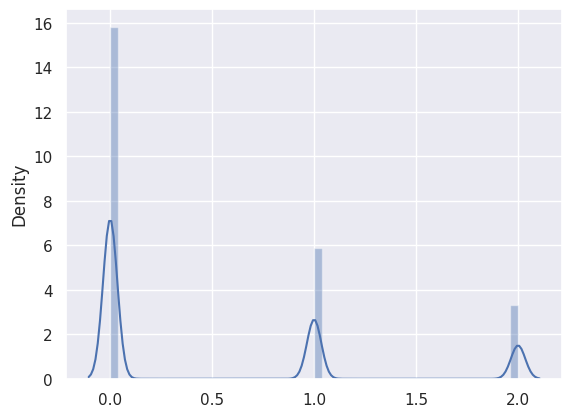

In [51]:
df = TrainTest_new.select('LABEL')

sns.distplot(df.toPandas())

In [52]:
TrainTest_new.select('LABEL').groupBy('LABEL').count().show()

+-----+-------+
|LABEL|  count|
+-----+-------+
|    1| 830775|
|    2| 467636|
|    0|2236571|
+-----+-------+



#### Data Stream

In [13]:
# 0: DEP_DELAY <= 0 <=> Không bị trễ.
Stream_new = Stream.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')<=0, 0).otherwise(f.col('DEP_DELAY')))
# 1: 0 < DEP_DELAY <= 30 minutes <=> Trễ từ 1 đến 30 phút.
Stream_new = Stream_new.withColumn('DEP_DELAY', f.when((f.col('DEP_DELAY')>0) & (f.col('DEP_DELAY')<=30), 1).otherwise(f.col('DEP_DELAY')))
# 2: DEP_DELAY > 30 minutes <=> Trễ hơn 30 phút hoặc hủy chuyến.
Stream_new = Stream_new.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')>30, 2).otherwise(f.col('DEP_DELAY')))
# Đổi tên DEP_DELAY -> LABEL
Stream_new = Stream_new.withColumnRenamed('DEP_DELAY', 'LABEL')
# Chuyển kiểu dữ liệu FLOAT -> INT
Stream_new = Stream_new.withColumn('LABEL', f.col('LABEL').cast("INT"))

In [14]:
Stream_new.printSchema()
Stream_new.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- LABEL: integer (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|LABEL|
+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|7/1/2025_AA_LAX_J...|      3|    7|           1|          2|               AA|   LAX| JFK|  2475.0|         819|    0|
|7/1/2025_AA_CLT_O...|      3|    7|           1|          2|      

/tmp/ipython-input-2697596445.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.toPandas())


<Axes: ylabel='Density'>

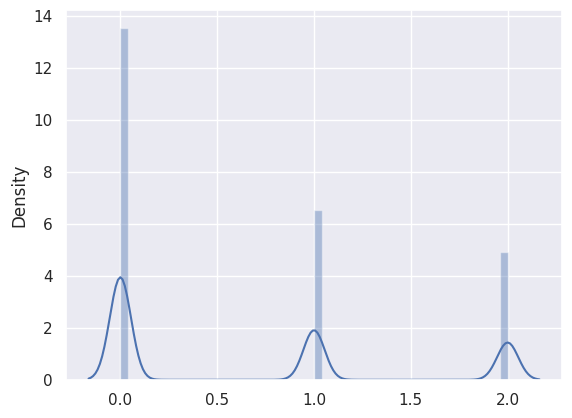

In [55]:
df = Stream_new.select('LABEL')

sns.distplot(df.toPandas())

In [56]:
Stream_new.select('LABEL').groupBy('LABEL').count().show()

+-----+------+
|LABEL| count|
+-----+------+
|    1|160429|
|    2|120628|
|    0|331754|
+-----+------+



### Save data

In [15]:
TrainTest_new.toPandas().to_csv(PATH+'TrainTest.csv')

In [16]:
Stream_new.toPandas().to_csv(PATH+'Stream.csv')